# Description

# Objetives





In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Cargamos los datos

In [4]:
df = pd.read_csv('50_Startups.csv')

### Visualizamos las 5 primeras filas

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Tenemos 4 variables numéricas y 1 categórica. Será necesario codificar la variable categórica antes de proporcionarsela al modelo. 

### Separamos las variables dependientes de las independientes

In [7]:
x = df.drop('Profit',axis=1)
y = df['Profit']

### Codificamos la variable categórica State

In [8]:
states=pd.get_dummies(x['State'],drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


Eliminamos la columna correspondiente a la variable categórica

In [9]:
x= x.drop('State',axis=1)
x.head(2)

,R&D Spend,Administration,Marketing Spend
0,165349.2,136897.80,471784.10
1,162597.7,151377.59,443898.53


In [10]:
x=pd.concat([x,states],axis=1)
x.head(2)

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.2,136897.80,471784.10,0,1
1,162597.7,151377.59,443898.53,0,0


### Separamos conjunto de train y test

In [11]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Regresión Lineal Múltiple

In [12]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [13]:
y_prediction =  LR.predict(x_test)
y_prediction

array([126362.87908255,  84608.45383634,  99677.49425147,  46357.46068582,
       128750.48288504,  50912.4174188 , 109741.35032702, 100643.24281647,
        97599.27574594, 113097.42524432])

In [14]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is',score)
print('mean_sqrd_error is ',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is ',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is 0.8987266414328637
mean_sqrd_error is  82010363.04430102
root_mean_squared error of is  9055.957323458466


## Ejercicios de clase

**Ejercicio 1**: Comprobar si existe valores "null"

In [15]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Como vemos no existen valores nulos.

**Ejercicio 2**: Probar otra forma de convertir variables categóricas a variables numéricas con LabelEncoder()

In [16]:
le = LabelEncoder()
df.State = le.fit_transform(df.State)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


- ¿Cuál es la diferencia con LabelEncoder? ¿Cuál es mejor?

La codificación tipo dummy crea para cada categoria una nueva variable y le asigna un vector de 0s y 1s que determina su existencia en el conjunto de datos. 

La codificación tipo LabelEncoder asigna a cada categoria un valor númerico. El rango de valores númericos varia entre cero y el número de categorias menos uno. La variable conserva su nombre y no se crean nuevas variables que identifiquen las distintas categorias. 

Tienen aplicación en diferentes contextos. Cuando la variable presenta un rango de categorias alto, el enfoque dummy creará una variable por cada categoría. En los casos que el número de categorías es alto puede aumentar en exceso el número de variables del conjunto de datos y por lo tanto su complejidad. A veces se pretende fijar como variable dependiente una categoria dentro de una variable, en este caso si es de utilidad usar dummy. 

Por otro lado LabelEncoder no aumenta la complejidad del sistema añadiendo variables siendo esto su principal ventaja. Por lo que en los casos en los que no queramos aumentar la complejidad del conjunto de datos es recomendable utilizar LabelEncoder.


**Ejercicio 3**: Realizar exploración de los datos de entrada y ver cúal de ellas es/son la/s más importante. Para ello, una de las opciones sería:

- Implementar **pairScatterPlot** de las variables de entrada con respecto a los distintos Estados
- **Mapa de correlaciones** con respecto la variable dependiente (Profit)

#### PairSatterPlot 

C:\Users\aleja\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


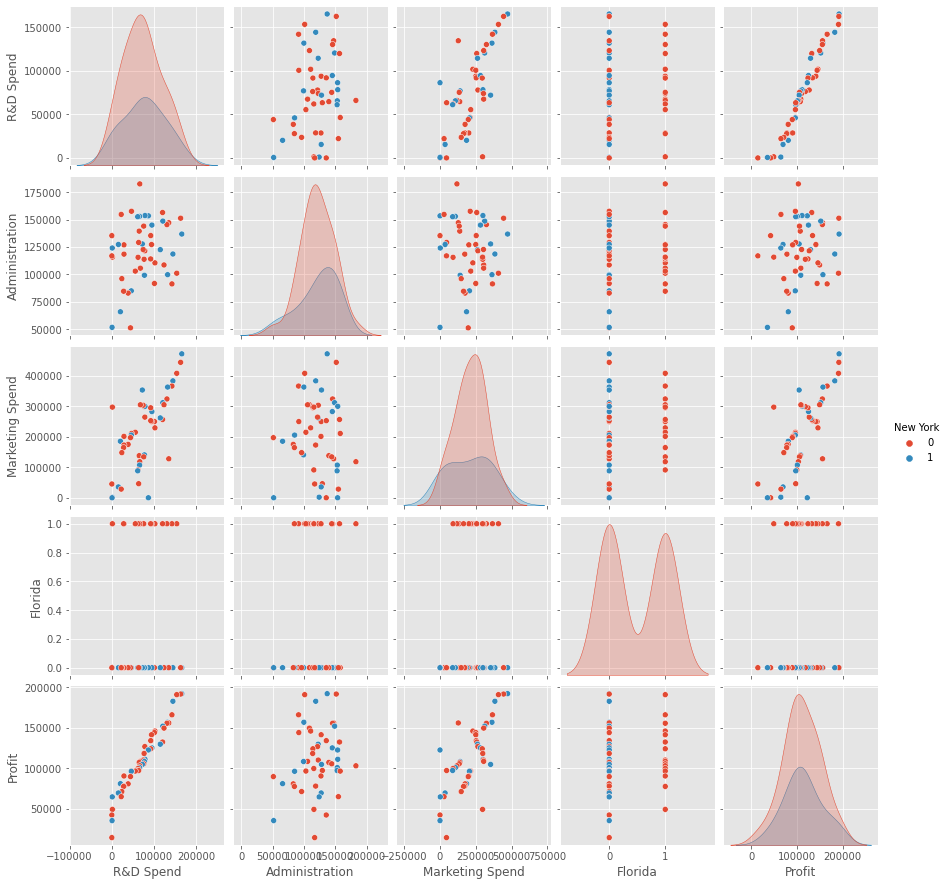

In [24]:
sns.pairplot(pd.concat([x, y], axis=1), hue='New York')

#### Mapa de correlaciones

<AxesSubplot:>

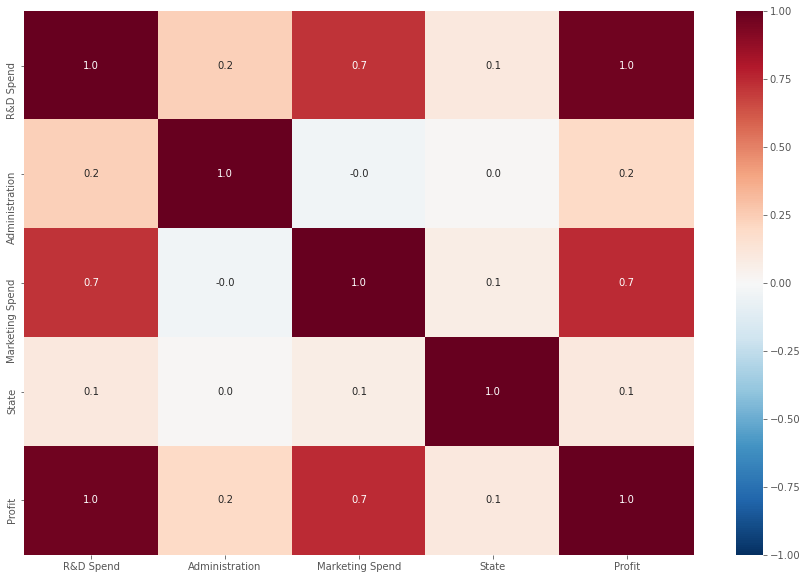

In [20]:
# Creamos la matriz de correlaciones
corr_mat = df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1)

Como vemos en ambos graficos se denota especial influencia sobre la variable profit las variables R&D y Marketing Spend. Seleccionando las dos variables mencionadas como las más influyentes sobre profit procedemos a comprobar que la técnica de Feature Selection sigue la misma elección.

**Ejercicio 4**: Implementar uno de los algoritmos de Feature Selection vistos en clase. ¿Has acertado con las variables más importantes en el Ejercicio 2?

In [27]:
X=df.drop(['Profit'], axis=1)
y=df['Profit']
# Definimos feature Selection K=2
feature_selection=SelectKBest(k=2)
# Fit Feature Selection
X_new = feature_selection.fit_transform(X, y)
# Selecionamos las características mas relevantes para nuestro problema
selected = feature_selection.get_support(indices=True)
print(X.columns[selected])

Index(['Marketing Spend', 'State'], dtype='object')


C:\Users\aleja\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


Como vemos las dos variables más significativos respecto de la variables Profit son Marketing Spend y State. 
Esta última sorprende su elección debido a los bajos coeficientes de correlación determinados en la matriz de correlación. No obstante en ScatterPairPlot muestra como según la zona una correlación alta respecto del Profit. 

**Conclusión:**

Con los algoritmos de regresión podemos predecir un valor futuro en base a la tendencia de los datos. Estos son usados en multitud de campos tales como la predicción de respuesta de un tratamiento o en el preprocesamiento de datos como método de imputación. También pueden ser usado como modelos explicativos a través de los pesos asociados a las distintas variables. Estos tienen métricas distintas a los algoritmos de clasificación. 

Respecto a las técnicas de codificación hemos visto porqué deben de ser aplicadas (proporcionar al modelo variables numéricas), como son sus características (creación de variables Dummy / rango numerico dependiente de cantidad de categorías LabelEncoder) y que tener en cuenta a la hora de su elección(complejidad del sistema y estudio de categoria independiente). 
